# HPSS on Multi-Axis data test

In this notebook, we check that HPSS functions work as expected on Multi-Axis data.

## Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
from caits import visualization as vis
from caits import hpss

## Step 2: Initialize data

In [2]:
# Parameters
sample_rate = 4000
duration = 1.0
n_fft = 200
hop_length = 100
n_channels = 2

# Generate time axis and multichannel signal: shape (samples, channels)
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
ch1 = np.sin(2 * np.pi * 55 * t)                   # 5 Hz sine wave
ch2 = np.sin(2 * np.pi * 110 * t)          # 10 Hz sine with phase shift
ch3 = np.sin(2 * np.pi * 220 * t)          # 15 Hz sine with phase shift
data = np.stack((ch1, ch2, ch3), axis=-1)              # shape: (1000, 2)

data.shape



(4000, 3)

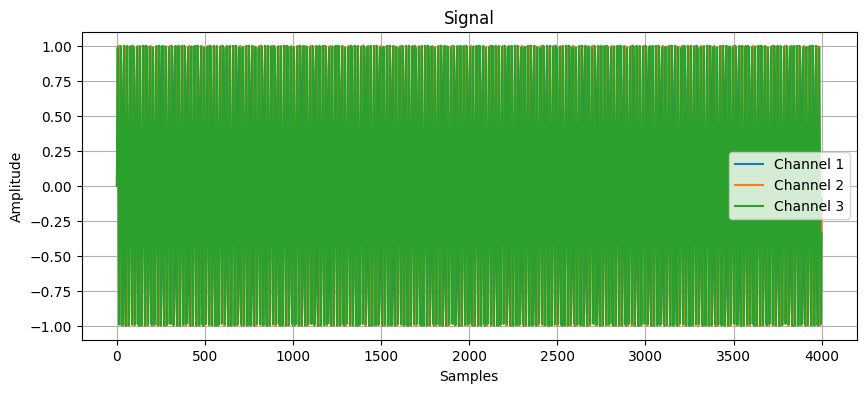

In [3]:
fig = vis.plot_signal(data, sr=sample_rate)

## Step 3: Calculate Mag phase

In [4]:
mags = hpss.magphase(data, power=1)
mags[0].shape, mags[1].shape

((4000, 3), (4000, 3))

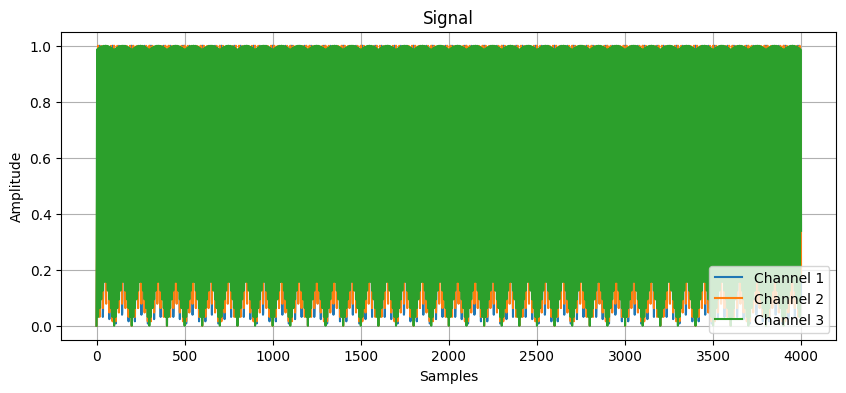

In [5]:
fig = vis.plot_signal(mags[0], sr=sample_rate)

/home/kirk/miniconda/envs/crossai-ts/lib/python3.11/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kirk/miniconda/envs/crossai-ts/lib/python3.11/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


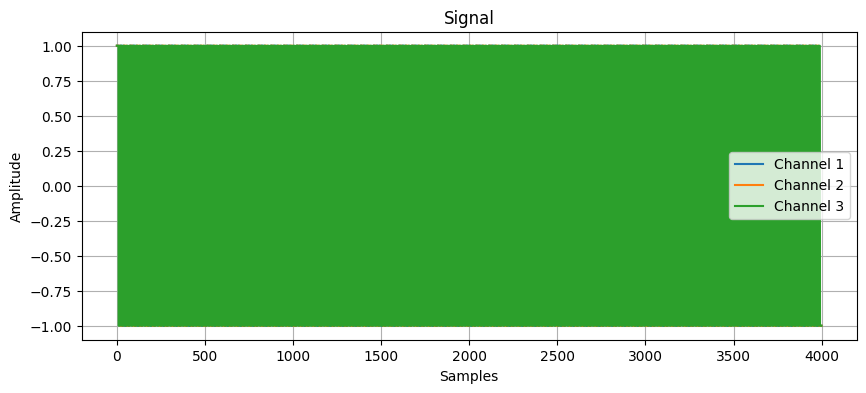

In [6]:
fig = vis.plot_signal(mags[1], sr=sample_rate)

## Step 4: Perform HPSS

In [8]:
hpss_sig = hpss.hpss(data)
hpss_sig[0].shape, hpss_sig[1].shape

((4000, 3), (4000, 3))

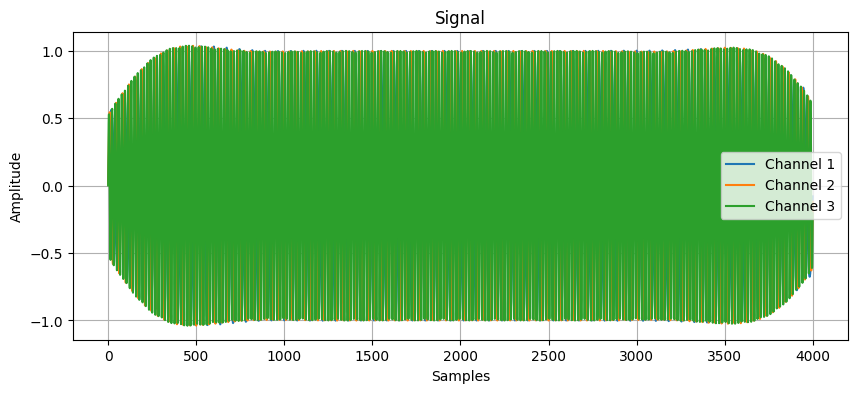

In [10]:
fig = vis.plot_signal(hpss_sig[0], sr=sample_rate)

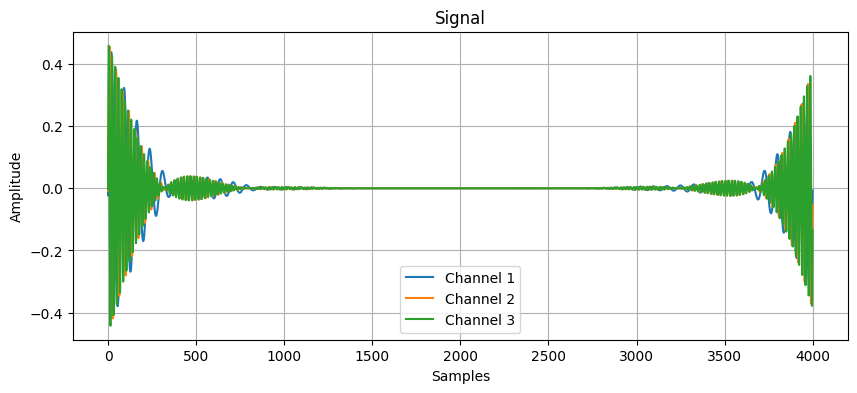

In [11]:
fig = vis.plot_signal(hpss_sig[1], sr=sample_rate)

# Test uni-axis

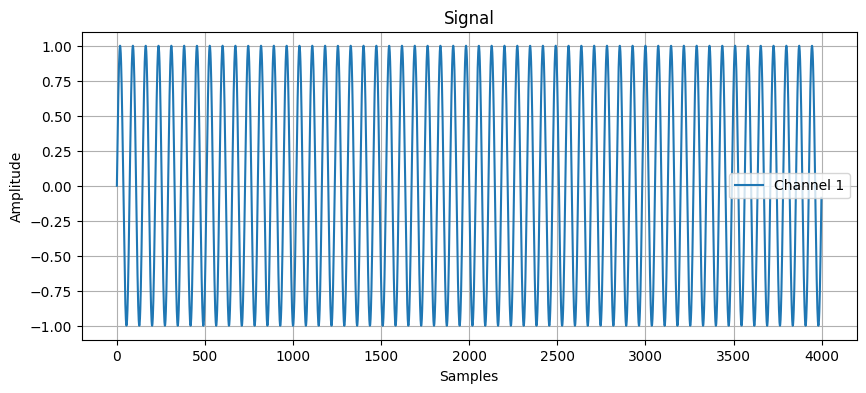

In [12]:
data_1d = data[:, 0]
fig = vis.plot_signal(data_1d, sr=sample_rate)

In [13]:
hpss_1d = hpss.hpss(data_1d)
hpss_1d[0].shape, hpss_1d[1].shape

((4000,), (4000,))

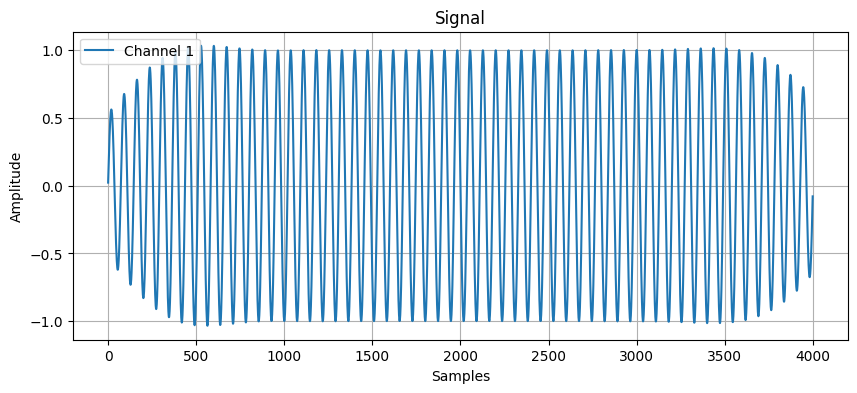

In [14]:
fig = vis.plot_signal(hpss_1d[0], sr=sample_rate)

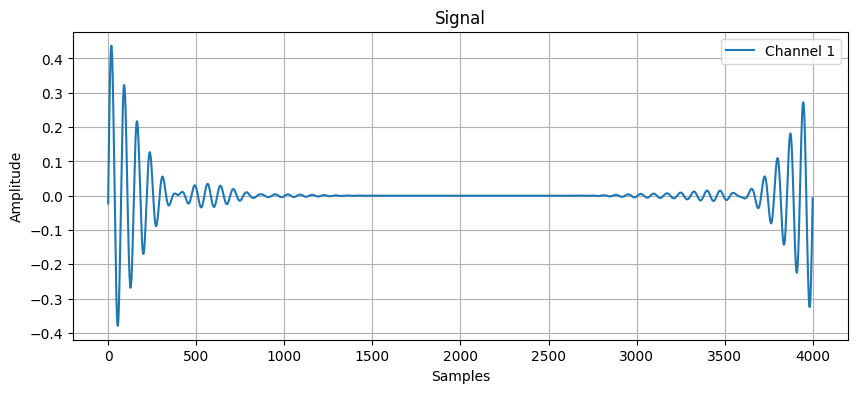

In [15]:
fig = vis.plot_signal(hpss_1d[1], sr=sample_rate)